# Jobs a GPU has to to
in this examples you'll see what a graphic card has to do. In the end it is more or less

1. Transformation of objects (move, rotate and deform) 
1. 3D projections (show 3D objects on your 2D screen)
1. Rendering surfaces which is a combination of the first and the second point 

Of course, these examples are very much simplified and the stuff graphic cards can do are much more elegant and advanced but what this simple example should show is that everything can be reduced to very basic floating point matrix algebra. And matrix multiplications can be executed massively in parallel as you can multiply every line column combination separately and detached.

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Transformation of a 2D form
in this example a squad will be moved, rotated and deformed. This is in a very simplyfied way every thing a graphic card has to do with forms

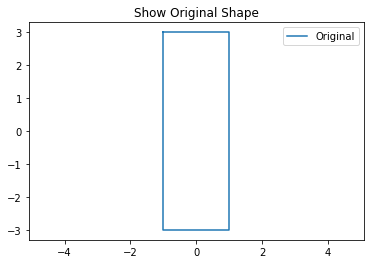

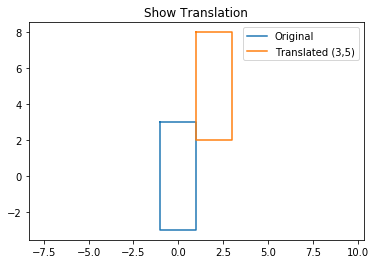

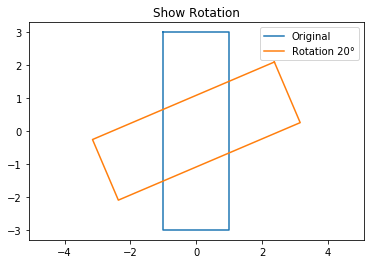

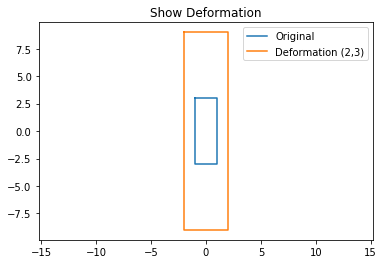

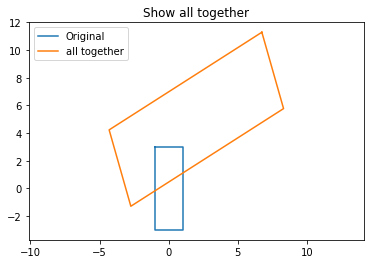

In [65]:
#original quad
o_1 = np.array([[-1,1,1,-1,-1],[3,3,-3,-3,3]])

#Translation
#move it 3 to the right and 5 up
trs = np.array([[2],[5]])
o_2 = o_1 + trs

#Rotation
#rotate by 20 Degrees
deg = math.pi / 180 + 20
rot = np.array([[math.cos(deg), math.sin(deg)],[-math.sin(deg), math.cos(deg)]])
o_3 = rot.dot(o_1)

#Deformation
#enlarg by 2 and 3
deff = np.array([[2,0],[0,3]])
o_4 = deff.dot(o_1) 

#all together
o_5 = deff.dot(rot.dot(o_1)) + trs

def show(shape, title, label):
    plt.axis('equal')
    plt.title(title, fontsize=12)
    plt.plot(o_1[0], o_1[1], label="Original")
    if(shape is not None):
        plt.plot(shape[0], shape[1], label=label)
    plt.legend()
    plt.show()
    

show(None, 'Show Original Shape', None)
show(o_2, 'Show Translation', 'Translated (3,5)')
show(o_3, 'Show Rotation', 'Rotation 20°')
show(o_4, 'Show Deformation', 'Deformation (2,3)')
show(o_5, 'Show all together', 'all together')

# 3D Projections
The second big job is to display a 3D object on the 2D screen. For more details please read https://en.wikipedia.org/wiki/3D_projection. What is implemented in here is a very simplified version as it puts the camera hole into (0,0,0) and the camera looks strait into x direction.

[[-0.8  0.8  0.8 -0.8 -0.8]
 [-1.2 -1.2  1.2  1.2 -1.2]]


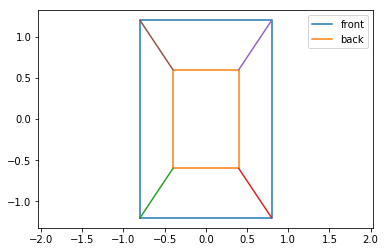

In [108]:
a = np.array([[ 5],[-2],[-3]])
b = np.array([[ 5],[ 2],[-3]])
c = np.array([[ 5],[ 2],[ 3]])
d = np.array([[ 5],[-2],[ 3]])

e = np.array([[10],[-2],[-3]])
f = np.array([[10],[ 2],[-3]])
g = np.array([[10],[ 2],[ 3]])
h = np.array([[10],[-2],[ 3]])


def project(p, s = 2):
    return np.array([[p[1][0]/p[0][0]*s],[p[2][0]/p[0][0]*s]])

a_1 = project(a)
b_1 = project(b)
c_1 = project(c)
d_1 = project(d)
e_1 = project(e)
f_1 = project(f)
g_1 = project(g)
h_1 = project(h)

cube_1 = np.concatenate((a_1,b_1,c_1,d_1,a_1), axis = 1)
cube_2 = np.concatenate((e_1,f_1,g_1,h_1,e_1), axis = 1)
cube_3 = np.concatenate((a_1,e_1), axis = 1)
cube_4 = np.concatenate((b_1,f_1), axis = 1)
cube_5 = np.concatenate((c_1,g_1), axis = 1)
cube_6 = np.concatenate((d_1,h_1), axis = 1)

print(cube_1)

plt.plot(cube_1[0], cube_1[1], label='front')
plt.plot(cube_2[0], cube_2[1], label='back')
plt.plot(cube_3[0], cube_3[1])
plt.plot(cube_4[0], cube_4[1])
plt.plot(cube_5[0], cube_5[1])
plt.plot(cube_6[0], cube_6[1])

plt.axis('equal')
plt.legend()
plt.show()
